### METAHEURISTICS EXAM DSTI A19
#### Jean MILPIED
#### date: May 26

### F3: Shifted Rosenbrock’s Function

The shifted Rosenbrock function is:  
sum for i = 1 to D-1 of 100*((z[i])^2 - z[i+1])^2 + bias, where z=x-O+1, x of D dimension and where O is the shift of dimension D

In [16]:
import scipy
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from random import uniform
import math
import time


In [53]:
#objective function

def objective_F3(my_x):
    my_z=my_x-my_shift+1
    my_z_square=np.square(my_z)[:-1]
    my_z_plusone=my_z[1:]
    my_J=np.sum(100*np.square((my_z_square-my_z_plusone)))+390 #bias is +390
    return my_J

In [54]:
#initialize function

def initialize_my_X (D,range_min, range_max):
    my_X_init=np.random.uniform(low=range_min, high=range_max, size=D)
    return my_X_init

In [55]:

global my_obj #we create a global variable to consolidate the evolution of the objective function
#call-back function for the optimizer

def costF(Xi):
    my_obj.append(objective_F3(Xi))

In [56]:
my_obj=[]



def problem(my_size, my_func,my_bound_min,my_bound_max):
    global my_shift
    my_X0_2=initialize_my_X(my_size,my_bound_min,my_bound_max)
    my_shift=initialize_my_X(my_size,my_bound_min,my_bound_max) #we initialize the shift at random (this can be changed)
    t1=time.time()
    res = minimize(my_func, my_X0_2,bounds=(my_bound_min,my_bound_max),method='BFGS',tol=1e-6,options={'gtol': 1e-6, 'maxiter':10000,'disp': True}, callback=costF)
    t2=time.time()
    plt.plot(np.array(my_obj)-390) #we plot fitness = evaluation of obj minus minimum = bias
    plt.xlabel("iterations")
    plt.ylabel("fitness")
    print("total computational time is ",np.round(t2-t1,4),"  seconds")
    print("optimization results are :", res.x)
    

C:\Users\jeanm\Anaconda3\envs\test\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


Optimization terminated successfully.
         Current function value: 390.000000
         Iterations: 1071
         Function evaluations: 58344
         Gradient evaluations: 1122
total computational time is  1.1243   seconds
optimization results are : [-65.11948769 -69.24982817 -87.07854171  58.18401267 -62.72771549
  50.05711369  17.75084924 -99.60353408  -2.18121201 -28.49409513
 -97.86021749  98.93252725  67.13591217 -43.89503247 -52.29240996
  -6.93113071  90.93043657  53.23095932  65.99721765  94.80320888
 -62.04754064 -71.83424184  97.75417154  31.0358128   13.23146254
  87.08304241 -87.79164602  71.62669251 -11.90611593 -46.10633722
  94.71188073 -41.17824529  33.61597763  48.43903301 -89.68113813
  85.14115375  -5.87774943   6.78268429  49.42346736  72.00291974
  59.86340769  17.94173264  -4.03238164   1.05413553 -37.94107547
  56.49145558  84.57817358 -26.45350289 -39.87329885 -46.70843093]


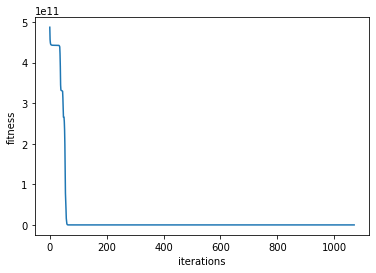

In [57]:
#for dim D =50
problem(50,objective_F3,-100,100)

         Current function value: 537.254233
         Iterations: 2098
         Function evaluations: 1197784
         Gradient evaluations: 2386
total computational time is  57.4708   seconds
optimization results are : [ 1.32544461e+01 -2.26934745e+01 -4.41470975e+01  4.03274180e+01
 -9.95107934e+01  9.44016895e+01  8.92518982e+01  2.73511860e+00
 -9.36757835e+01  2.33442483e+01  9.41060274e+01 -3.40103679e+01
 -9.36030090e+01  5.93838027e+01 -7.61076789e+01 -7.68467339e+01
 -7.65491839e+01 -1.83096005e+01  7.37843241e+01  1.09078168e+01
 -7.60553406e+01  3.05183973e+01  6.64460844e+01  7.30776460e+01
 -1.00289997e+02 -8.24738989e+01  9.44273262e+01 -8.64931318e+01
 -2.26808499e+01  5.15758060e+01  4.00426940e+01 -5.59098955e+01
  8.12790855e+01 -8.06460106e+01 -4.24520486e+01 -1.79775857e+01
 -2.21705625e+01  3.54094940e+01 -9.42963492e+01 -2.71297247e+01
 -4.56003567e+01 -1.24204747e+01  3.36283374e+01  7.60509593e+00
 -1.72809502e+01  2.01634949e+01  6.93033358e+01  1.80597126e+01
 

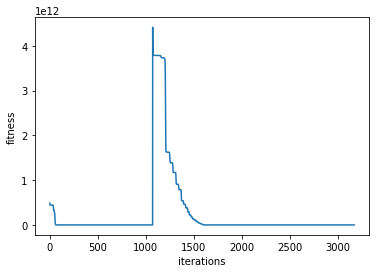

In [58]:
#for dim D= 500
problem(500,objective_F3,-100,100)